In [137]:
import pandas as pd

data_ = pd.read_csv('/Users/rishikumra/Downloads/Projects/sentiment-analysis-sec-master/data/data_2cleaned.csv')
data_ = data_.drop(columns = ['Unnamed: 0'])

In [208]:
data_['Outlook'] = np.where(data_['Future Return']>0.04, 1, 0)

In [219]:
len(data_)
corr_ = data_[['Outlook', 'litigous_score','superfluous_score','interesting_score', 'modal_score', 'harvard_1', 'polarity_score', 'avg_sen_length','fog_index']]


24

In [226]:
import pandas as pd

data_ = pd.read_csv('/Users/rishikumra/Downloads/Projects/sentiment-analysis-sec-master/data/data_2cleaned.csv')
data_ = data_.drop(columns = ['Unnamed: 0'])

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data split
y = data_['Outlook']
X = data_[['litigous_score', 'superfluous_score', 'interesting_score', 'modal_score', 'harvard_1', 'polarity_score', 'avg_sen_length', 'fog_index']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Streamlit Dashboard
st.title("Model Comparison Dashboard")

# Logistic Regression
st.header("Logistic Regression")
model = LogisticRegression()
model.fit(X_train, y_train)
log_reg_acc = model.score(X_test, y_test)
st.write(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")
st.write("Logistic Regression Coefficients:")
st.write(model.coef_)

# Random Forest with adjustable n_estimators
st.header("Random Forest Classifier")
rf_estimators = st.slider("Number of Estimators (Random Forest)", min_value=50, max_value=500, value=100, step=50)
rf_model = RandomForestClassifier(n_estimators=rf_estimators, random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
st.write(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Feature Importance for Random Forest
st.subheader("Feature Importance (Random Forest)")
rf_feature_importance = rf_model.feature_importances_
fig, ax = plt.subplots()
sns.barplot(x=rf_feature_importance, y=X.columns, ax=ax)
st.pyplot(fig)

# Confusion Matrix for Random Forest
st.subheader("Confusion Matrix (Random Forest)")
rf_cm = confusion_matrix(y_test, rf_pred)
fig, ax = plt.subplots()
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=ax)
st.pyplot(fig)

# Gradient Boosting with adjustable n_estimators
st.header("Gradient Boosting Classifier")
gb_estimators = st.slider("Number of Estimators (Gradient Boosting)", min_value=50, max_value=500, value=100, step=50)
gb_model = GradientBoostingClassifier(n_estimators=gb_estimators, random_state=0)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
st.write(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

# Feature Importance for Gradient Boosting
st.subheader("Feature Importance (Gradient Boosting)")
gb_feature_importance = gb_model.feature_importances_
fig, ax = plt.subplots()
sns.barplot(x=gb_feature_importance, y=X.columns, ax=ax)
st.pyplot(fig)

# Confusion Matrix for Gradient Boosting
st.subheader("Confusion Matrix (Gradient Boosting)")
gb_cm = confusion_matrix(y_test, gb_pred)
fig, ax = plt.subplots()
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', ax=ax)
st.pyplot(fig)

# Run Streamlit
# In terminal, run: streamlit run dashboard.py



In [261]:
y = data_['Outlook']
X = data_[['litigous_score','superfluous_score','interesting_score', 'modal_score', 'harvard_1', 'polarity_score', 'avg_sen_length','fog_index']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 15)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=15)
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=15)
gb_model.fit(X_train, y_train)
gb_accuracy = gb_model.score(X_test, y_test)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

model.coef_


0.75
Random Forest Accuracy: 0.8750
Gradient Boosting Accuracy: 0.6250


array([[-4.73564314e-03,  8.03917930e-05, -2.23406078e-04,
        -3.11452677e-04,  4.01409508e-03,  5.14433045e-03,
        -3.09557345e-03,  7.46823221e-03]])

In [270]:
# Equal weighting -> buy/sell 

data_.loc[X_test.index]
rf_model.predict(X_test)
weighting = 1/len(rf_model.predict(X_test))
return_ = []
# model.predict(X_test)
index_ = 0
for i in rf_model.predict(X_test):
    if i == 0:
        return_.append(-weighting*data_.loc[X_test.index[index_], 'Future Return'])
    else:
        return_.append(weighting*data_.loc[X_test.index[index_], 'Future Return'])
    index_ +=1

sum(return_)
# return_
# rf_model.predict(X_test)

0.233589390504558

In [139]:
y = data_['Future Return']
X = data_[['litigous_score','superfluous_score','interesting_score', 'modal_score', 'harvard_1', 'polarity_score', 'avg_sen_length','fog_index']]

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
import numpy as np

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-4, 1, 50)  # 50 alpha values from 0.0001 to 10
best_rmse = float('inf')
best_alpha = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop over the alpha values
for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    mean_rmse = -np.mean(scores)  # Negate because scores are negative RMSE
    
    print(f"Alpha: {alpha:.4f}, Mean RMSE: {mean_rmse:.4f}")
    
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_alpha = alpha
        best_scores = scores

print(f"Best Alpha: {best_alpha:.4f}, Best RMSE: {best_rmse:.4f}")
print(-best_scores)

Alpha: 0.0001, Mean RMSE: 0.4309
Alpha: 0.0001, Mean RMSE: 0.4260
Alpha: 0.0002, Mean RMSE: 0.4213
Alpha: 0.0002, Mean RMSE: 0.4166
Alpha: 0.0003, Mean RMSE: 0.4122
Alpha: 0.0003, Mean RMSE: 0.4081
Alpha: 0.0004, Mean RMSE: 0.4042
Alpha: 0.0005, Mean RMSE: 0.4007
Alpha: 0.0007, Mean RMSE: 0.3976
Alpha: 0.0008, Mean RMSE: 0.3949
Alpha: 0.0010, Mean RMSE: 0.3925
Alpha: 0.0013, Mean RMSE: 0.3906
Alpha: 0.0017, Mean RMSE: 0.3889
Alpha: 0.0021, Mean RMSE: 0.3876
Alpha: 0.0027, Mean RMSE: 0.3865
Alpha: 0.0034, Mean RMSE: 0.3857
Alpha: 0.0043, Mean RMSE: 0.3850
Alpha: 0.0054, Mean RMSE: 0.3845
Alpha: 0.0069, Mean RMSE: 0.3841
Alpha: 0.0087, Mean RMSE: 0.3837
Alpha: 0.0110, Mean RMSE: 0.3835
Alpha: 0.0139, Mean RMSE: 0.3833
Alpha: 0.0176, Mean RMSE: 0.3831
Alpha: 0.0222, Mean RMSE: 0.3830
Alpha: 0.0281, Mean RMSE: 0.3829
Alpha: 0.0356, Mean RMSE: 0.3828
Alpha: 0.0450, Mean RMSE: 0.3828
Alpha: 0.0569, Mean RMSE: 0.3827
Alpha: 0.0720, Mean RMSE: 0.3827
Alpha: 0.0910, Mean RMSE: 0.3826
Alpha: 0.1

In [140]:
train_data = data_[(data_.year>2013) & (data_.year <2018)]

In [141]:
test_data = data_[(data_.year >2017)]

In [195]:
y_train = train_data['Future Return']
x_train = train_data[['litigous_score','superfluous_score','interesting_score', 'modal_score', 'harvard_1', 'polarity_score',	'avg_sen_length','fog_index']]
y_test = test_data['Future Return']
x_test = test_data[['litigous_score','superfluous_score','interesting_score', 'modal_score', 'harvard_1', 'polarity_score',	'avg_sen_length','fog_index']]


In [196]:
from sklearn.linear_model import LinearRegression
import numpy as np

y = data_['Future Return']
X = data_[['litigous_score','superfluous_score','interesting_score', 'modal_score', 'harvard_1', 'polarity_score', 'avg_sen_length','fog_index']]
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
correct_directions = np.sign(predictions) == np.sign(y_test)

# Calculate the percentage of correct directions
accuracy = np.mean(correct_directions) * 100
accuracy
model.score(x_test, y_test)
mean_squared_error(y_test, predictions)

-12.00588367708659

In [204]:
accuracy
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(x_train)
# X_test_scaled = scaler.transform(x_test)

Lasso_model = Lasso(alpha=0.0001)
Lasso_model.fit(x_train, y_train)
Lasso_preds = Lasso_model.predict(x_test)
correct_directions = np.sign(Lasso_preds) == np.sign(y_test)

# Calculate the percentage of correct directions
accuracy = np.mean(correct_directions) * 100
print(accuracy)
lasso_mse = mean_squared_error(y_test, Lasso_model.predict(x_test))
print(lasso_mse)

Lasso_model.coef_
# Lasso_model.score(x_train, y_train)

75.0
0.07437434838202714


array([-1.14376741e+01, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.74437926e+00, -0.00000000e+00, -1.29957804e-05,  0.00000000e+00])

In [272]:
# x_train.columns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the data
data_ = pd.read_csv('/Users/rishikumra/Downloads/Projects/sentiment-analysis-sec-master/data/data_2cleaned.csv')
data_ = data_.drop(columns=['Unnamed: 0'])

# Prepare the data
y = data_['Future Return']
X = data_[['litigous_score', 'superfluous_score', 'interesting_score',
            'modal_score', 'harvard_1', 'polarity_score',
            'avg_sen_length', 'fog_index']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=25)

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'MSE', 'R² Score'])

# Function to evaluate and display results for a model
# Function to evaluate and display results for a model
def evaluate_model(model_name, model, x_train, y_train, x_test, y_test, results_df):
    # Fit the model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Create a DataFrame for the current model's results
    new_result = pd.DataFrame({'Model': [model_name], 'MSE': [mse], 'R² Score': [r2]})

    # Concatenate the new results with the existing results_df
    results_df = pd.concat([results_df, new_result], ignore_index=True)

    # Plot actual vs predicted values
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.scatterplot(x=y_test, y=predictions, ax=ax)
    ax.plot(y_test, y_test, color='red', linestyle='--')  # 45-degree line
    ax.set_xlabel("Actual Future Return")
    ax.set_ylabel("Predicted Future Return")
    ax.set_title(f"{model_name}: Actual vs Predicted")

    # Save the plot
    plt.savefig(f"{model_name.replace(' ', '_')}_actual_vs_predicted.png")
    plt.close(fig)  # Close the figure to avoid display in notebook

    # Show predictions in a table
    predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    predictions_df.to_csv(f"{model_name.replace(' ', '_')}_predictions.csv", index=False)

    return results_df


# Function to optimize and evaluate models
def optimize_and_evaluate_models(results_df):
    # Linear Regression with Standardization
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    linear_model = LinearRegression()
    results_df = evaluate_model("Optimized Linear Regression", linear_model, x_train_scaled, y_train, x_test_scaled, y_test, results_df)

    # Random Forest Regression with Hyperparameter Tuning
    rf_model = RandomForestRegressor(random_state=25)
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    rf_grid_search = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=0)
    rf_grid_search.fit(x_train, y_train)
    best_rf_model = rf_grid_search.best_estimator_
    results_df = evaluate_model("Optimized Random Forest Regression", best_rf_model, x_train, y_train, x_test, y_test, results_df)

    # Gradient Boosting Regression with Hyperparameter Tuning
    gb_model = GradientBoostingRegressor(random_state=25)
    param_grid_gb = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    gb_grid_search = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='neg_mean_squared_error', verbose=0)
    gb_grid_search.fit(x_train, y_train)
    best_gb_model = gb_grid_search.best_estimator_
    results_df = evaluate_model("Optimized Gradient Boosting Regression", best_gb_model, x_train, y_train, x_test, y_test, results_df)

    return results_df

# Optimize and evaluate models
results_df = optimize_and_evaluate_models(results_df)

# Display the MSE comparison table for optimized models
print("Optimized Model Comparison Table")
print(results_df)

# Save the results to a CSV file
results_df.to_csv('optimized_model_comparison.csv', index=False)


/var/folders/ky/0fxd4xv519n3q64h15l3snx40000gn/T/ipykernel_66702/3702407703.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_result], ignore_index=True)


Optimized Model Comparison Table
                                    Model      MSE  R² Score
0             Optimized Linear Regression  0.30977 -1.059627
1      Optimized Random Forest Regression  0.17338 -0.152784
2  Optimized Gradient Boosting Regression  0.14140  0.059850


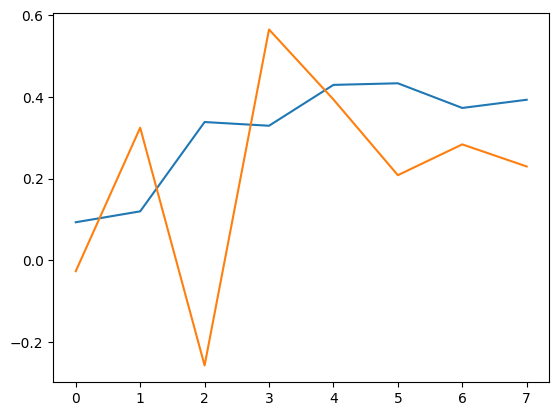

In [192]:
from sklearn.linear_model import Ridge

# Fit Ridge model
ridge = Ridge(alpha=0.4)  # Alpha controls the amount of regularization
ridge.fit(x_train, y_train)
ridge_preds = ridge.predict(x_test)
# Get the coefficients
ridge_coefs = ridge.coef_

mean_squared_error(y_test, ridge_preds)
# ridge.score(x_test, y_test)

plt.plot(range(len(ridge_preds)), ridge_preds)

plt.plot(range(len(y_test)),y_test)


In [174]:
predictions = model.predict(x_test)
correct_directions = np.sign(ridge_preds) == y_test

# Calculate the percentage of correct directions
accuracy = np.mean(correct_directions) * 100
accuracy

75.0

In [175]:
accuracy
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, xgb_preds)
mape

96.50868531316519

0.789825641025641


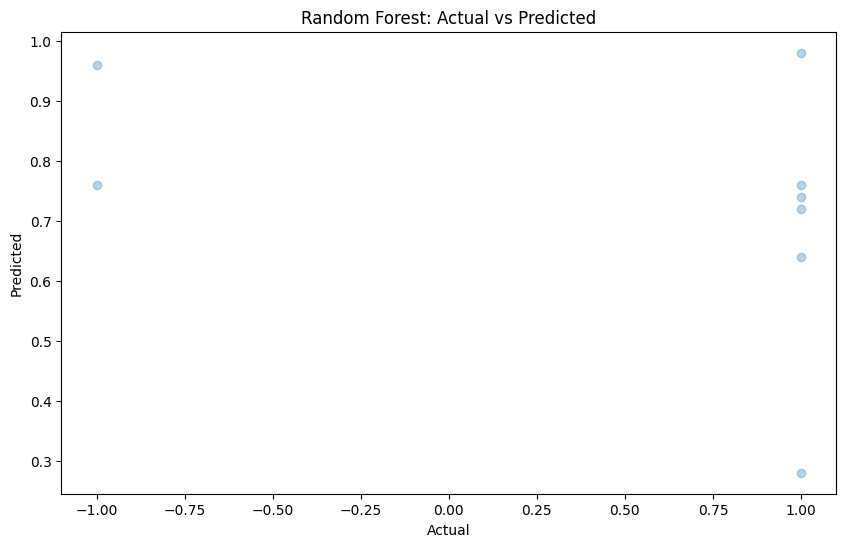

In [176]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# Fit Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)

print(rf_model.score(x_train, y_train))
# Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, rf_preds, alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')
plt.show()


In [178]:
rf_preds
correct_directions = np.sign(rf_preds) == np.sign(y_test)

# Calculate the percentage of correct directions
accuracy = np.mean(correct_directions) * 100

accuracy

75.0

In [179]:
accuracy
print(rf_model.score(x_test, y_test))

-0.2985333333333331


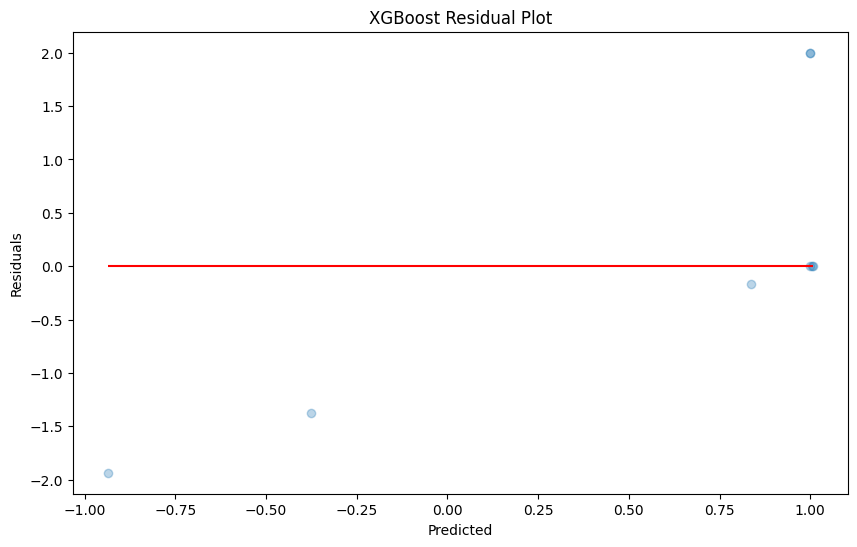

In [180]:
from xgboost import XGBRegressor

# Fit XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(x_train, y_train)
xgb_preds = xgb_model.predict(x_test)

plt.figure(figsize=(10,6))
plt.scatter(xgb_preds, xgb_preds - y_test, alpha=0.3)
plt.hlines(y=0, xmin=min(xgb_preds), xmax=max(xgb_preds), color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('XGBoost Residual Plot')
plt.show()

In [181]:
correct_directions = np.sign(xgb_preds) == np.sign(y_test)

# Calculate the percentage of correct directions
accuracy = np.mean(correct_directions) * 100
accuracy

50.0

In [182]:
xgb_model.score(x_test, y_test)

-1.277061470003003

In [52]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)

In [53]:
rf_preds

array([0.49200504, 0.21927855, 0.33602901, 0.51184346, 0.45964847,
       0.39119436, 0.41045068, 0.31480106])

In [132]:
data_

,year,company,positive_score,negative_score,litigous_score,superfluous_score,interesting_score,modal_score,harvard_1,polarity_score,avg_sen_length,fog_index,Future Return
0,2014,AMERICAN EXPRESS CO,0.008967,0.021055,0.017580,0.000224,0.001607,0.014124,0.047509,-0.402600,33202,13280.973893,0.036627
1,2015,AMERICAN EXPRESS CO,0.008588,0.022653,0.018550,0.000172,0.001603,0.014447,0.048322,-0.450199,32329,12931.773862,-0.242095
2,2016,AMERICAN EXPRESS CO,0.008121,0.020689,0.013058,0.000177,0.001374,0.011426,0.053947,-0.436245,46143,18457.367887,0.085822
3,2017,AMERICAN EXPRESS CO,0.007330,0.022370,0.013551,0.000149,0.001588,0.012558,0.057231,-0.506390,37799,15119.770491,0.362164
4,2018,AMERICAN EXPRESS CO,0.007614,0.021746,0.012938,0.000081,0.001629,0.012615,0.058108,-0.481302,38732,15492.970464,-0.026202
5,2019,AMERICAN EXPRESS CO,0.007582,0.022409,0.013071,0.000118,0.001368,0.013307,0.056927,-0.494353,36912,14764.973992,0.325174
6,2014,Facebook Inc,0.006800,0.021328,0.010787,0.000109,0.001775,0.017205,0.042083,-0.516486,21236,8494.584065,0.427630
7,2015,Facebook Inc,0.006199,0.020486,0.010144,0.000141,0.001803,0.017583,0.044043,-0.535355,20623,8249.385967,0.341451
8,2016,Facebook Inc,0.006545,0.020980,0.010719,0.000114,0.001686,0.018550,0.045590,-0.524384,20292,8116.984073,0.099274
9,2017,Facebook Inc,0.006459,0.022241,0.012631,0.000104,0.001641,0.019142,0.046903,-0.549890,22332,8932.981426,0.533768


/var/folders/ky/0fxd4xv519n3q64h15l3snx40000gn/T/ipykernel_66702/4164508066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data['Sign'] = np.sign(data_['Future Return'])


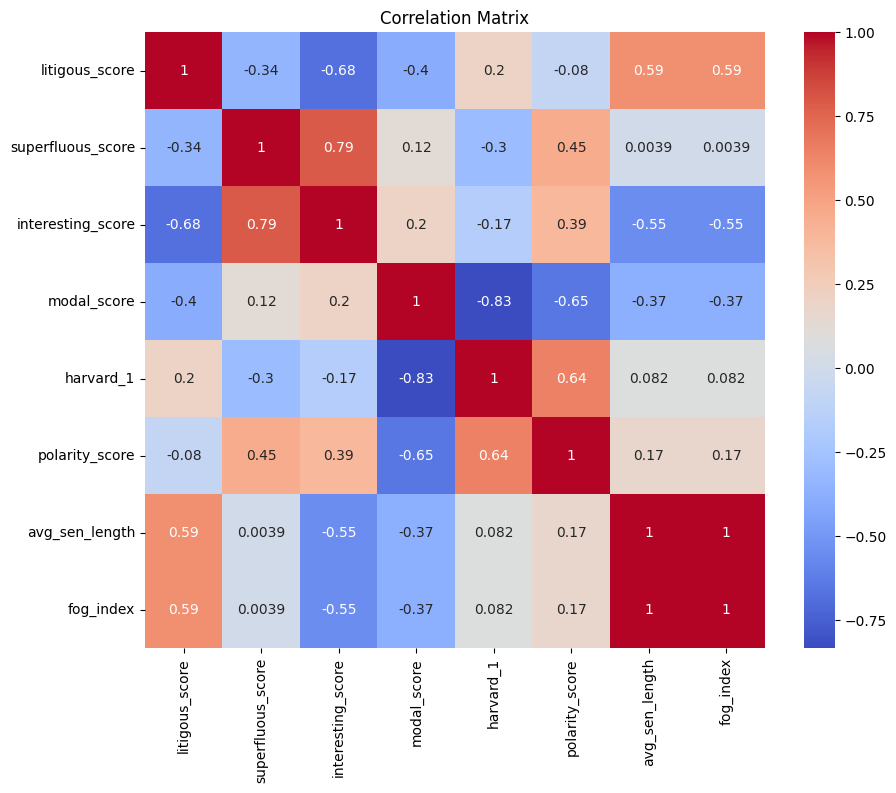

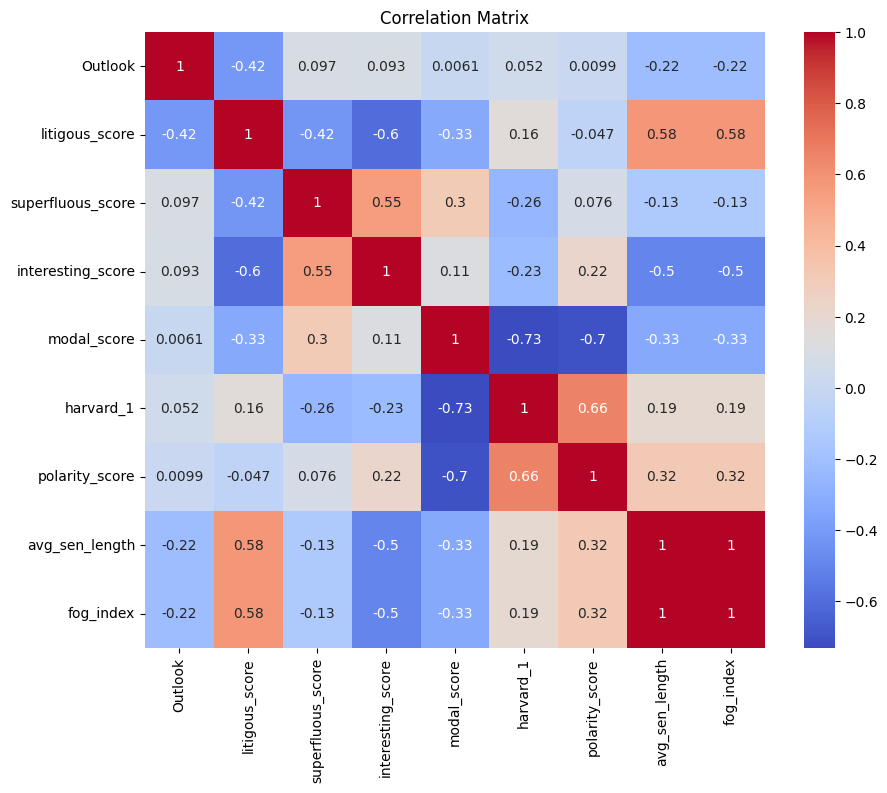

In [227]:
import seaborn as sns



corr_data = data_[['litigous_score','superfluous_score','interesting_score', 'modal_score', 'harvard_1', 'polarity_score',	'avg_sen_length','fog_index']]
corr_data['Sign'] = np.sign(data_['Future Return'])

plt.figure(figsize=(10,8))
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(corr_.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [111]:
from sklearn.linear_model import LassoCV, RidgeCV

# LassoCV to find the best alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso_cv.fit(X_train_scaled, y_train)
print('Best alpha for Lasso:', lasso_cv.alpha_)

# RidgeCV to find the best alpha
ridge_cv = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print('Best alpha for Ridge:', ridge_cv.alpha_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06477979052071392, tolerance: 0.00024497832151942515
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11120559553858544, tolerance: 0.00024497832151942515
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10385222595402077, tolerance: 0.00024497832151942515
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordina

Best alpha for Lasso: 10000.0
Best alpha for Ridge: 10000.0
